### 1. Linear Regression

Importing all necesary libraries for analysis

In [1]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_squared_error 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import random

In [2]:
cols = ['alcohol_by_weight', 'rating', 'bitterness', 'nitrogen', 
        'turbidity', 'sugars', 'degree_of_fermentation', 
        'calorific_value', 'density', 'pH', 'colour', 'sulphites']

cols_new = ['alcohol_by_weight', 'bitterness', 'nitrogen', 
            'turbidity', 'sugars', 'degree_of_fermentation', 
            'calorific_value', 'density', 'pH', 'colour', 'sulphites', 'rating']

df = pd.read_table("beer_ratings.txt", names = cols)

df = df[cols_new]

df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,4.964243,9.637821,0.628862,0.939390,16.305962,68.374036,18.389957,0.966954,3.803814,14.106389,14.020433,67.323718
std,0.521894,1.852364,0.187830,0.662604,8.465123,35.483428,10.147082,0.001937,0.157151,3.726049,10.288885,10.047955
min,4.000000,5.700000,0.220000,0.000000,7.560000,9.384000,4.000000,0.960640,3.240000,7.095000,1.875000,38.000000
25%,4.523810,8.300000,0.490000,0.332000,11.970000,55.522000,10.000000,0.965770,3.700000,11.825000,6.562500,60.000000
50%,4.809524,9.300000,0.620000,0.896400,13.860000,62.560000,16.000000,0.966935,3.800000,13.330000,11.250000,64.000000
75%,5.238095,10.700000,0.740000,1.494000,17.010000,71.944000,24.000000,0.968100,3.900000,15.748750,18.515625,74.000000
max,7.095238,17.000000,1.680000,3.320000,86.940000,477.020000,69.000000,0.973200,4.400000,43.000000,90.312500,94.000000


In [3]:
scaler = StandardScaler() 
df = pd.DataFrame(scaler.fit_transform(df), columns = cols_new)

X = df.iloc[:, :-1] # Independent Variables

y = df.iloc[:, -1] # Dependent Variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 24)

df.describe()

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
count,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02,9.360000e+02
mean,-1.502715e-15,-6.167906e-17,5.954401e-17,-8.065723e-18,8.101307e-17,2.293986e-16,1.053289e-16,4.555188e-14,-2.280939e-16,2.775558e-16,-1.448865e-16,8.316591e-16
std,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.848573e+00,-2.126972e+00,-2.177935e+00,-1.418483e+00,-1.033728e+00,-1.663356e+00,-1.418896e+00,-3.261357e+00,-3.589647e+00,-1.882728e+00,-1.181073e+00,-2.919937e+00
25%,-8.443659e-01,-7.226094e-01,-7.396939e-01,-9.171614e-01,-5.124887e-01,-3.623919e-01,-8.272765e-01,-6.117196e-01,-6.609553e-01,-6.126083e-01,-7.252409e-01,-7.292661e-01
50%,-2.966164e-01,-1.824701e-01,-4.720724e-02,-6.491472e-02,-2.891002e-01,-1.639398e-01,-2.356574e-01,-9.998881e-03,-2.428332e-02,-2.084793e-01,-2.694086e-01,-3.309623e-01
75%,5.250079e-01,5.737249e-01,5.920112e-01,8.374641e-01,8.321378e-02,1.006631e-01,5.531681e-01,5.917219e-01,6.123887e-01,4.410138e-01,4.371315e-01,6.647971e-01
max,4.085380e+00,3.976602e+00,5.599223e+00,3.594733e+00,8.348585e+00,1.152269e+01,4.990311e+00,3.225864e+00,3.795749e+00,7.758636e+00,7.418963e+00,2.656316e+00


In [4]:
lr = LinearRegression()
model_lr = lr.fit(X_train, y_train)

In [5]:
model_lr.score(X_train, y_train)

0.42036806271004346

In [6]:
model_lr.score(X_test, y_test)

0.4087336577126648

In [7]:
y_pred_test = model_lr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
y_pred_train = model_lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

0.821879191328895
0.747214454417156


In [8]:
parameters = {'fit_intercept':[True, False], 'normalize':[True, False], 'copy_X':[True, False]}
grid = GridSearchCV(model_lr, parameters, cv = 10)

In [9]:
grid.fit(X, y)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [10]:
grid.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [11]:
grid.score(X_train, y_train)

0.41638298543738583

In [12]:
grid.score(X_test, y_test)

0.43946081789598845

In [13]:
lr_optimal = LinearRegression(copy_X= True, fit_intercept= False, normalize= True)

In [14]:
model_optimised_lr = lr.fit(X_train, y_train)

In [15]:
model_optimised_lr.score(X_train, y_train)

0.42036806271004346

In [16]:
model_optimised_lr.score(X_test, y_test)

0.4087336577126648

In [17]:
pred_train_lr = cross_val_predict(model_optimised_lr, X_train, y_train, cv = 10)

In [18]:
pred_test_lr = cross_val_predict(model_optimised_lr, X_test, y_test, cv = 10)

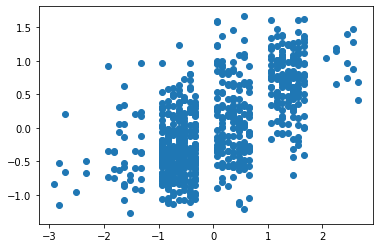

In [19]:
plt.scatter(y_train, pred_train_lr)

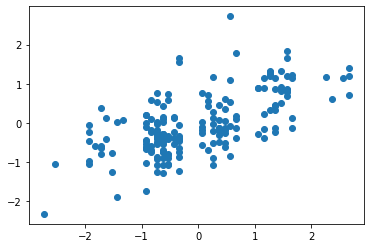

In [20]:
plt.scatter(y_test, pred_test_lr)

In [21]:
metrics.r2_score(y_train, pred_train_lr)

0.3922031370917697

In [22]:
metrics.r2_score(y_test, pred_test_lr)

0.399631206490326

In [23]:
np.sqrt(metrics.mean_squared_error(y_train, pred_train_lr))

0.765153093045723

In [24]:
np.sqrt(metrics.mean_squared_error(y_test, pred_test_lr))

0.8281813783396006

In [25]:
(metrics.mean_absolute_error(y_train, pred_train_lr))

0.5961581544488662

In [26]:
(metrics.mean_absolute_error(y_test, pred_test_lr))

0.655395610491199

In [27]:
coeffs = model_lr.coef_
coeffs

array([ 0.30794059,  0.19079657, -0.25751295, -0.02908371,  0.07104206,
       -0.09918681,  0.00768877, -0.14574767, -0.00615089,  0.22682403,
       -0.06310066])

In [28]:
feature_names = df.drop('rating', axis = 1).columns
feature_names

Index(['alcohol_by_weight', 'bitterness', 'nitrogen', 'turbidity', 'sugars',
       'degree_of_fermentation', 'calorific_value', 'density', 'pH', 'colour',
       'sulphites'],
      dtype='object')

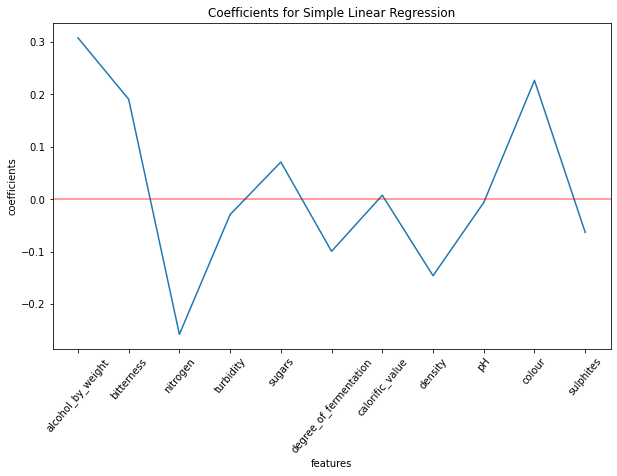

In [29]:
# Using matplotlib commands to plot
plt.figure(figsize = (10, 6))
plt.plot(range(len(coeffs)), coeffs)
plt.axhline(0, color = 'r', linestyle = 'solid', alpha = 0.5)
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficients for Simple Linear Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [30]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,alcohol_by_weight,bitterness,nitrogen,turbidity,sugars,degree_of_fermentation,calorific_value,density,pH,colour,sulphites,rating
alcohol_by_weight,1.000000,-0.016824,-0.210243,0.167979,0.103502,-0.219820,-0.137138,-0.439275,0.164576,0.182277,-0.179765,0.485269
bitterness,-0.016824,1.000000,-0.267128,0.714752,0.157287,0.097563,-0.152302,0.692441,-0.696943,0.219821,-0.100906,0.184049
nitrogen,-0.210243,-0.267128,1.000000,-0.553430,0.014922,0.077959,-0.000771,0.015526,0.245762,-0.321050,0.073513,-0.460148
turbidity,0.167979,0.714752,-0.553430,1.000000,0.164361,0.197110,-0.047851,0.395288,-0.568624,0.362208,0.012473,0.325147
sugars,0.103502,0.157287,0.014922,0.164361,1.000000,0.056434,0.111773,0.333236,-0.126374,0.011596,0.157443,0.038322
degree_of_fermentation,-0.219820,0.097563,0.077959,0.197110,0.056434,1.000000,0.003139,0.205604,-0.259548,0.327863,0.003468,-0.130206
calorific_value,-0.137138,-0.152302,-0.000771,-0.047851,0.111773,0.003139,1.000000,-0.039410,0.009576,-0.008716,0.689033,-0.082588
density,-0.439275,0.692441,0.015526,0.395288,0.333236,0.205604,-0.039410,1.000000,-0.366854,0.138441,0.042346,-0.133847
pH,0.164576,-0.696943,0.245762,-0.568624,-0.126374,-0.259548,0.009576,-0.366854,1.000000,-0.196386,-0.065321,-0.120790
colour,0.182277,0.219821,-0.321050,0.362208,0.011596,0.327863,-0.008716,0.138441,-0.196386,1.000000,-0.000656,0.354907


In [31]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=6, random_state=24))
X_pca = pca.fit_transform(X_train)
model_pca = model_lr.fit(X_pca,y_train)

This is a decent score we can come back to and try and improve with GridSearchCV

In [32]:
alpha_values = {'alpha': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}
lasso= GridSearchCV(Lasso(), alpha_values, scoring = 'r2', cv = 10)
print(lasso.fit(X_train, y_train).best_params_)

{'alpha': 0.01}


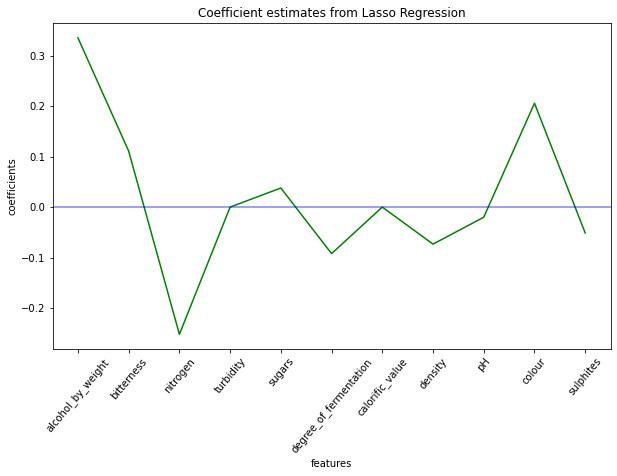

In [33]:
# Creating an object containing the best Lasso regression model
best_lasso_model= Lasso(alpha = 0.01)
# Extracting the coefficient estimates for all ten features
best_lasso_coeffs = best_lasso_model.fit(X_train, y_train).coef_
# plotting the coefficient estimates for all ten features
plt.figure(figsize = (10, 6))
plt.plot(range(len(feature_names)), best_lasso_coeffs, color = 'g')
plt.axhline(0, color = 'b', linestyle = 'solid', alpha = 0.5)
plt.xticks(range(len(feature_names)), feature_names, rotation = 50)
plt.title("Coefficient estimates from Lasso Regression")
plt.ylabel("coefficients")
plt.xlabel("features")
plt.show()

In [34]:
best_lasso_model.fit(X_train, y_train).score(X_train, y_train)

0.418401303548681

In [35]:
best_lasso_model.fit(X_train, y_train).score(X_test, y_test)

0.4155737261230982

In [36]:
y_pred_test = best_lasso_model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
y_pred_train = best_lasso_model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, y_pred_train)))

0.8171114048703213
0.7484810740305687


In [37]:
best_lasso_coeffs

array([ 0.33515329,  0.11083301, -0.25192164,  0.        ,  0.03780094,
       -0.09210249, -0.        , -0.07333668, -0.02005348,  0.20567542,
       -0.05124948])

In [38]:
cross_val_score(lasso, X_test, y_test, cv = 10).mean()

0.3500920075425238

### 3. Regression Tree

In [39]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt.score(X_test, y_test) # R^2

0.16802720036028784

In [40]:
param_dict = {
    "criterion": ["mse", "mae", "r2"],
    "min_samples_split": range(2, 11),
    "max_depth": range(1, 10),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(1, 10)
}

In [41]:
grid = GridSearchCV(dt,
                   param_grid = param_dict,
                   cv = 10,
                   n_jobs = -1)

In [42]:
dt_model = grid.fit(X_train, y_train)

In [43]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 3,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [44]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=9)

In [45]:
grid.score(X_train, y_train)

0.44884828266143584

In [46]:
grid.score(X_test, y_test)

0.428420925384442

In [47]:
dt = DecisionTreeRegressor(criterion = 'mse',
                           max_depth = 3,
                           min_samples_leaf = 9,
                           min_samples_split = 4)
dt.fit(X_train, y_train)
print(f'Training Score: {(round(100 * dt.score(X_train, y_train), 2))}%, Test Score: {round(100 * dt.score(X_test, y_test), 2)}%')

Training Score: 44.88%, Test Score: 42.84%


In [48]:
pred_train_dt = cross_val_predict(dt, X_train, y_train, cv = 10)

In [49]:
pred_test_dt = cross_val_predict(dt, X_test, y_test, cv = 10)

In [50]:
metrics.r2_score(y_train, pred_train_dt)

0.34634402259575214

In [51]:
metrics.r2_score(y_test, pred_test_dt)

0.17689751446957724

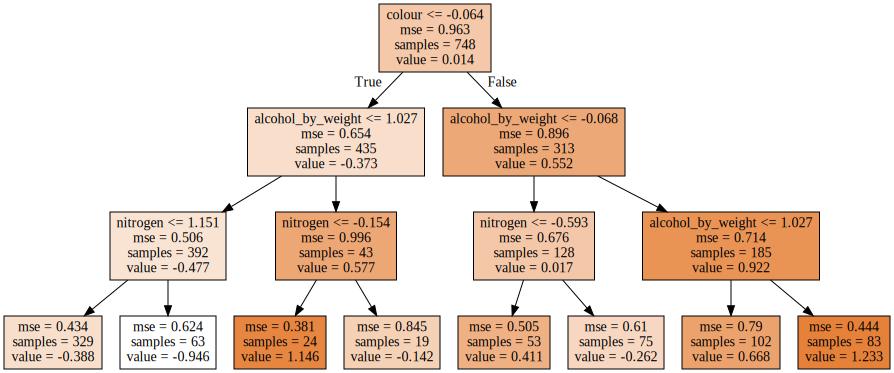

In [52]:
dot_data = tree.export_graphviz(dt, feature_names = list(X), 
                                class_names = sorted(y.unique()), filled = True)
graphviz.Source(dot_data)

### 3. SVM

In [53]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', C = 1.5, gamma = 1e-07, epsilon = 0.5)
regressor.fit(X_train, y_train)

SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

In [54]:
regressor.score(X_test, y_test)

0.40252785643126154

In [55]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
clf = GridSearchCV(regressor, parameters)
model_svm = clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.41828850406839446

In [56]:
clf.best_estimator_

SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

In [57]:
svr = SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')

In [58]:
svr = svr.fit(X_train, y_train)

In [59]:
pred_train_svr = cross_val_predict(svr, X_train, y_train, cv = 10)

In [60]:
pred_test_svr = cross_val_predict(svr, X_test, y_test, cv = 10)

In [61]:
metrics.r2_score(y_train, pred_train_svr)

0.3912578631934581

In [62]:
metrics.r2_score(y_test, pred_test_svr)

0.3344683162445875

### 4. KNN

In [63]:
params = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors' : range(1, 100),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan', 'minkowski'],
    'p': [1, 2]
}

In [64]:
from sklearn.neighbors import KNeighborsRegressor
gs = GridSearchCV(
    KNeighborsRegressor(),
    params,
    cv = 10,
    n_jobs = -1
)

In [65]:
grid = gs.fit(X_train, y_train)

In [66]:
grid

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidian', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 100), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [67]:
grid.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', metric='manhattan', n_neighbors=23,
                    p=1, weights='distance')

In [68]:
gs.score(X_train, y_train)

0.9948451327797244

In [69]:
grid.score(X_test, y_test)

0.5210382185536369

In [70]:
knn = KNeighborsRegressor(metric = 'manhattan', n_neighbors = 6, weights = 'distance', p = 1, algorithm='ball_tree')
model_optimised = knn.fit(X_train, y_train)

In [71]:
model_optimised.score(X_train, y_train)

0.9948451327797244

In [72]:
model_optimised.score(X_test, y_test)

0.5485662411389145

In [73]:
pred_train_knn = cross_val_predict(model_optimised, X_train, y_train, cv = 10)

In [74]:
pred_test_knn = cross_val_predict(model_optimised, X_test, y_test, cv = 10)

In [75]:
metrics.r2_score(y_train, pred_train_knn)

0.4406864016815478

In [76]:
metrics.r2_score(y_test, pred_test_knn)

0.3661055041799607

In [77]:
rmse_val = [] #to store rmse values for different k
k = []
for K in range(50):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    k.append(K)

Text(10, 0.83, 'Optimal k = 6')

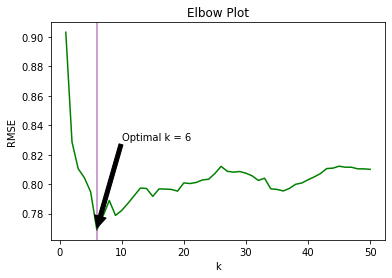

In [78]:
fig, ax = plt.subplots()
plt.plot(k, rmse_val, 'g-')
plt.axvline(x=6, c ='purple', alpha = 0.5)
plt.title('Elbow Plot')
plt.xlabel('k')
plt.ylabel('RMSE')
ax.annotate('Optimal k = 6', xy=(6, 0.77), xytext=(10, 0.83),
            arrowprops=dict(facecolor='black', shrink=0.005))
            

In [79]:
y_pred = knn.predict(X_test)

In [80]:
from sklearn.decomposition import PCA

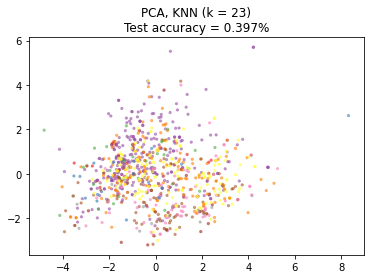

In [81]:
pca = make_pipeline(StandardScaler(),
                    PCA(n_components=4, random_state=24))
plt.figure()
pca.fit(X_train, y_train)
knn.fit(pca.transform(X_train), y_train)
acc_knn = knn.score(pca.transform(X_test), y_test)
X_plot = pca.transform(X)

# Plot the projected points and show the evaluation score
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=5, cmap='Set1', alpha = 0.5)
plt.title("PCA, KNN (k = {})\nTest accuracy = {:.3f}%".format(23, 0.397))
plt.show()